In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
#width and height in inches..
rcParams['figure.figsize']=10,8
import math

In [2]:
# read .csv from provided dataset
csv_filename="AirQualityCSV.csv"

# df=pd.read_csv(csv_filename,index_col=0)
air_data=pd.read_csv(csv_filename, sep=";" , parse_dates= ['Date','Time'])

In [3]:
air_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-10-03,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,2004-10-03,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,2004-10-03,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,2004-10-03,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,2004-10-03,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


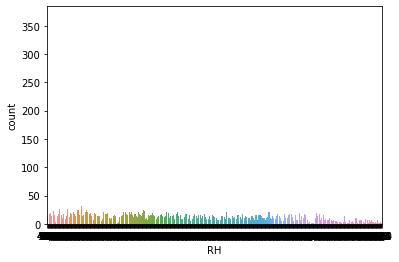

In [4]:
  sns.countplot(x="RH" ,data = air_data)

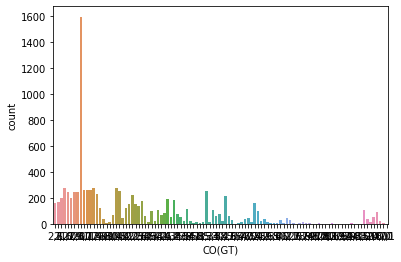

In [5]:
 sns.countplot(x="CO(GT)" ,data = air_data)

In [6]:
air_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
air_data.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                   object
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                 object
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                        object
RH                       object
AH                       object
Unnamed: 15             float64
Unnamed: 16             float64
dtype: object

In [8]:
#droping all null values
#air_data.dropna(inplace = True)

#drop end rows with NaN values
#air_data.dropna(how='all',inplace=True)
#drop RH NAN rows
#air_data.dropna(thresh=10,axis=0,inplace=True)

In [9]:
#basic statistics
air_data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [13]:
air_data.dropna(how="all",axis=1,inplace=True)
air_data.dropna(how="all",axis=0,inplace=True)

In [14]:
print('Count of missing values:\n',air_data.shape[0]-air_data.count())

Count of missing values:
 Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [15]:
# #making a list of 2nd column to last column in air_data set .. 
cols = list(air_data.columns[2:])
# cols = list(air_data)

In [16]:
air_data.shape

(9357, 15)

In [17]:

for col in cols:
    if air_data[col].dtype != 'float64':
            str_x = pd.Series(air_data[col]).str.replace(',','.')
            float_X = []
            for value in str_x.values:
                fv = float(value)
                float_X.append(fv)

                air_data[col] = pd.DataFrame(float_X)



In [18]:
air_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


If you might have noticed, the values in our data don't contain decimal 
places but have weird commas in place of them. For example 9.4 is
written as 9,4. 
We'll correct it using the following piece of code:

 Pandas Series is a one-dimensional labeled array capable of holding
data of any type (integer, string, float, python objects, etc.).
The axis labels are collectively called index. Pandas Series is nothing 
 but a column in an excel sheet.

In [31]:
air_data.drop(['Date','Time'],axis=1,inplace=True)

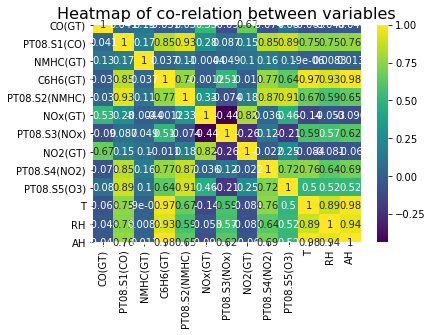

In [21]:
#Use heatmap to see corelation between variables
sns.heatmap(air_data.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

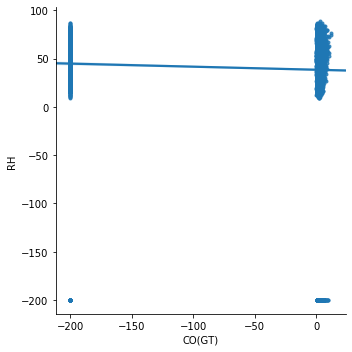

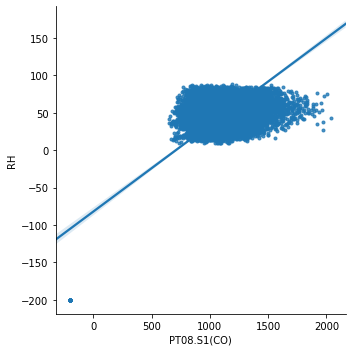

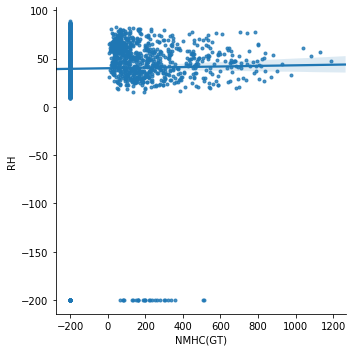

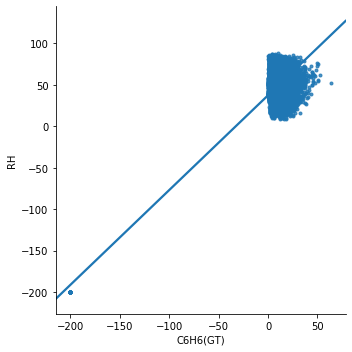

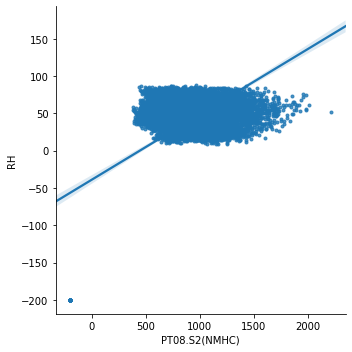

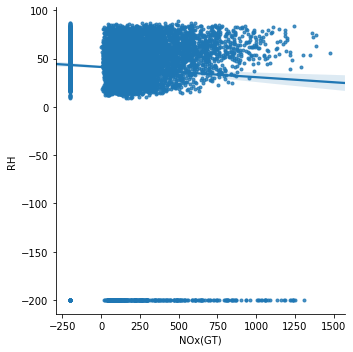

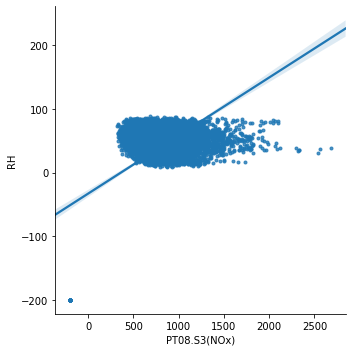

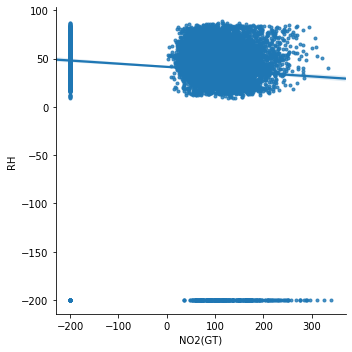

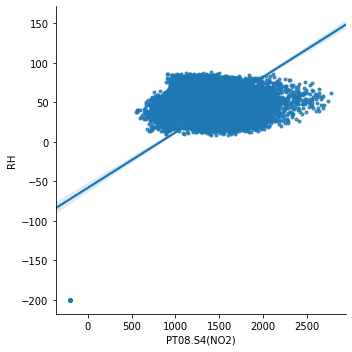

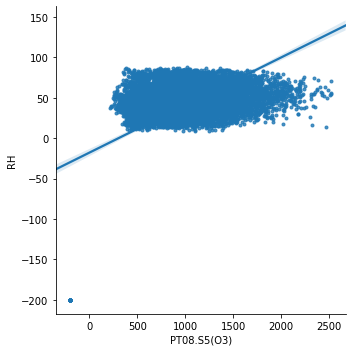

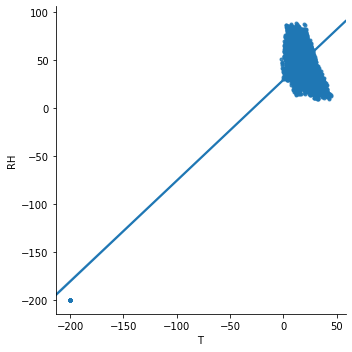

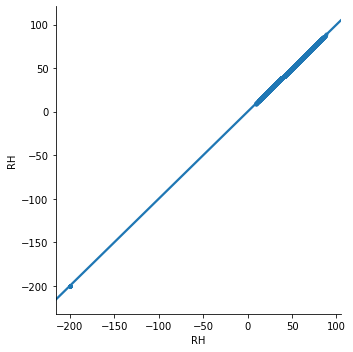

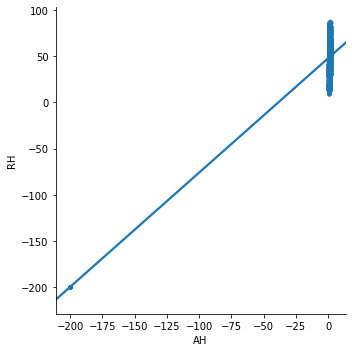

In [23]:
#plot all X-features against output variable RH
#col_=df_air.columns.tolist()[2:]
for i in air_data.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=air_data,markers='.')

# Linear Regression

In [37]:
#using linear regression
from sklearn.preprocessing import StandardScaler        
#import normalisation package
from sklearn.model_selection import train_test_split, cross_val_score  
#import train test split
from sklearn.linear_model import LinearRegression        
#import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error  
#import mean squared error and mean absolute error



In [38]:
X=air_data.drop('RH',axis=1)     #X-input features
y=air_data['RH']                    #y-input features

In [33]:
# ss=StandardScaler()     #initiatilise
# X_std=ss.fit_transform(X)     #apply stardardisation

In [40]:
#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6549, 12)
Test data size: (2808, 12)


In [41]:
#Train the model
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data


In [42]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: 57.20132748480017
--------------------------------
Slope:


[('CO(GT)', 0.0046449860557575195),
 ('PT08.S1(CO)', 0.00836271226304428),
 ('NMHC(GT)', -0.015516345261614639),
 ('C6H6(GT)', -1.0768601028753078),
 ('PT08.S2(NMHC)', -0.04703902877648255),
 ('NOx(GT)', 0.028853733056595263),
 ('PT08.S3(NOx)', -0.020330567030892872),
 ('NO2(GT)', -0.04973224486997458),
 ('PT08.S4(NO2)', 0.057718621009725954),
 ('PT08.S5(O3)', -0.0005369624783978147),
 ('T', -2.0410840472061924),
 ('AH', 4.4378905107861035)]

In [43]:
y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)
#rmse must be lower for a good model

Baseline RMSE of model: 7.938449935542616


In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

#r2 score should be more

0.9752375034270131